# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import time

import ray
import joblib
# import mlflow
# from mlflow.models import infer_signature

In [2]:
import pickle

In [3]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df['booking_complete'].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

## Univariate

### Booking Completion
The amount of Uncompleted Booking is Higher than Completed Booking

<Axes: xlabel='booking_complete', ylabel='count'>

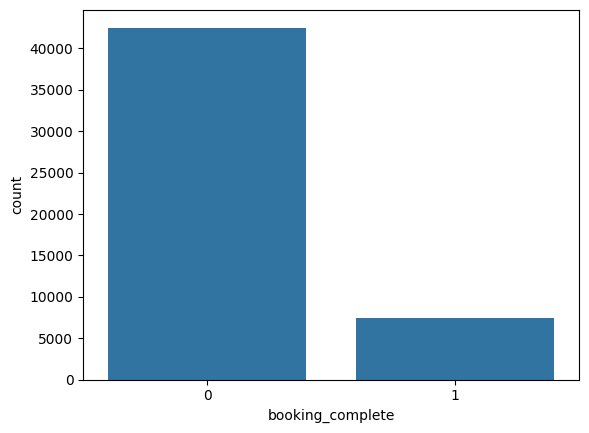

In [6]:
sns.countplot(df, x='booking_complete')

## Top 10 Booking Origin
Most of the passengers come from Australia

<Axes: title={'center': 'Top 10 Places where People Book the Most'}, xlabel='booking_origin', ylabel='count'>

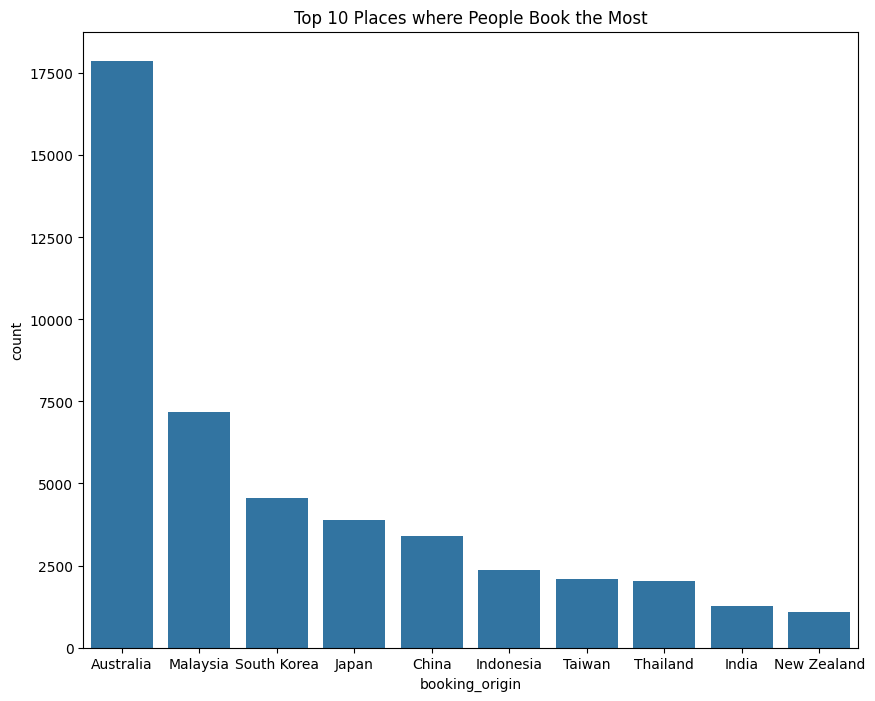

In [7]:
#Top 10 most booking countries 
plt.figure(figsize=(10,8))
plt.title('Top 10 Places where People Book the Most')
sns.countplot(df, x='booking_origin',  order=df.booking_origin.value_counts().iloc[:10].index)

## Bivariate

### Type of trip and Booking Completion
No Difference. Most of the passengers order round trip

<Axes: title={'center': 'Types of Trips People Take'}, xlabel='trip_type', ylabel='count'>

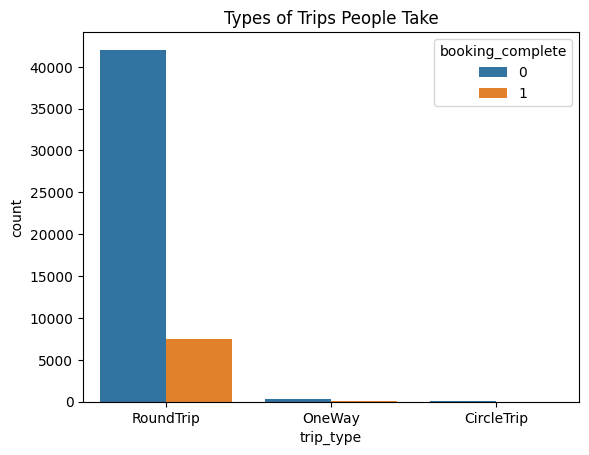

In [8]:
# type of trip to book
plt.title('Types of Trips People Take')
sns.countplot(df, x='trip_type', hue=df['booking_complete'].astype(str), order=df.trip_type.value_counts().index)

### Most of Flight day

No difference either.

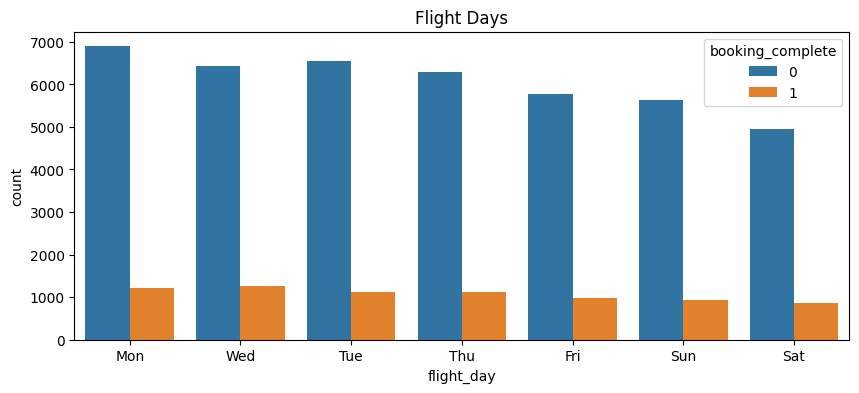

In [9]:
# Most flight day, booking and not booking
plt.figure(figsize=(10,4))
plt.title('Flight Days')
sns.countplot(df, x='flight_day', hue=df['booking_complete'].astype(str), order=df.flight_day.value_counts().index)
plt.show()

### Sales Channel and Booking Completion

No difference either. Most of passengers order with Internet.

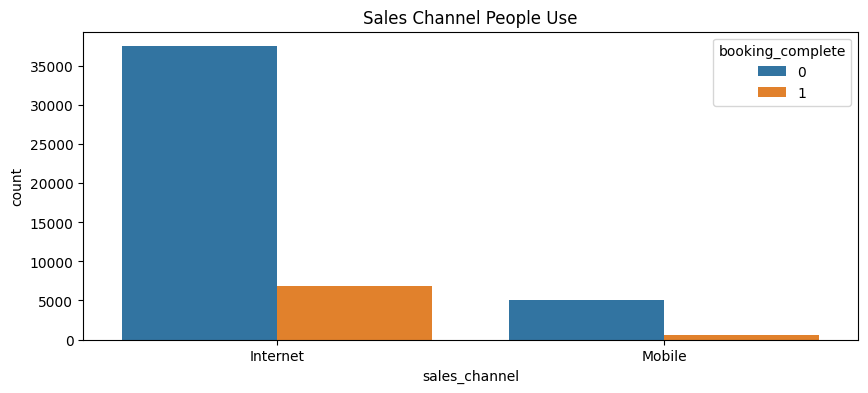

In [10]:
# Most flight day, booking and not booking
plt.figure(figsize=(10,4))
plt.title('Sales Channel People Use')
sns.countplot(df, x='sales_channel', hue=df['booking_complete'].astype(str), order=df.sales_channel.value_counts().index)
plt.show()

### Num. of Passengers and Booking completion

No difference from last features.

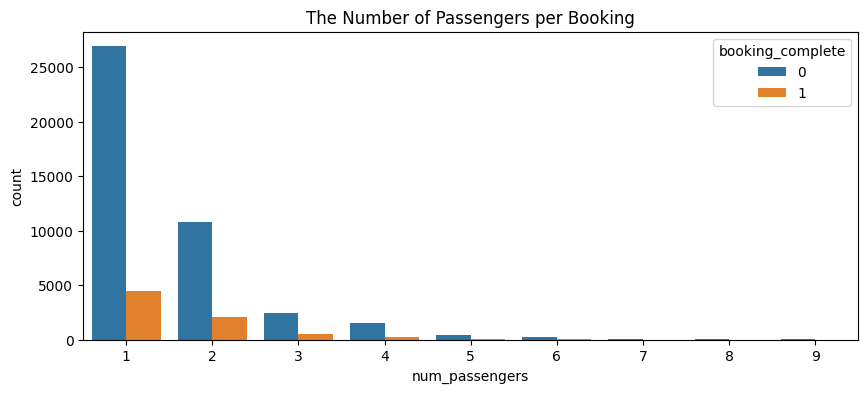

In [11]:
# Most flight day, booking and not booking
plt.figure(figsize=(10,4))
plt.title('The Number of Passengers per Booking')
sns.countplot(df, x='num_passengers', hue=df['booking_complete'].astype(str), order=df.num_passengers.value_counts().index)
plt.show()

## Multivariate

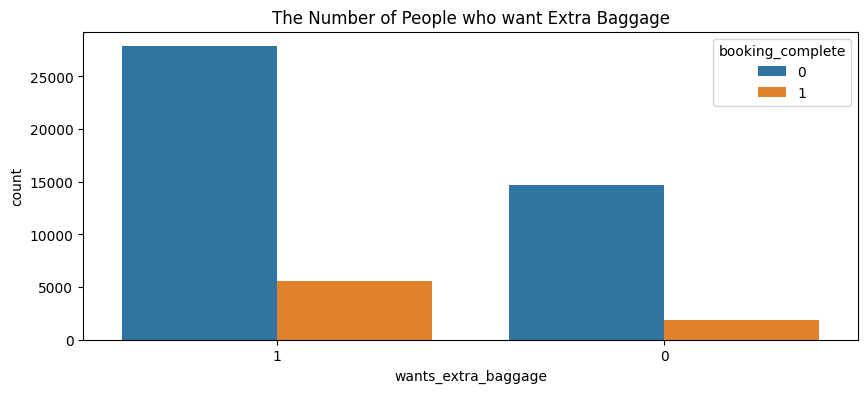

In [12]:
# Most flight day, booking and not booking
plt.figure(figsize=(10,4))
plt.title('The Number of People who want Extra Baggage')
sns.countplot(df, x='wants_extra_baggage', hue=df['booking_complete'].astype(str), order=df.wants_extra_baggage.value_counts().index)
plt.show()

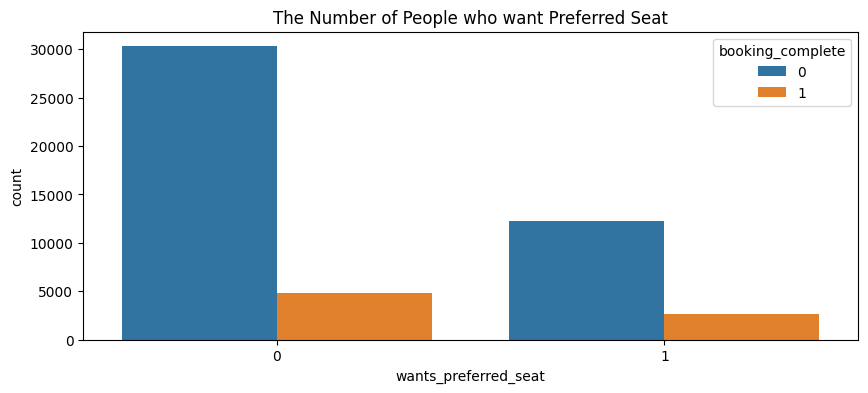

In [13]:
# Most flight day, booking and not booking
plt.figure(figsize=(10,4))
plt.title('The Number of People who want Preferred Seat')
sns.countplot(df, x='wants_preferred_seat', hue=df['booking_complete'].astype(str), order=df.wants_preferred_seat.value_counts().index)
plt.show()

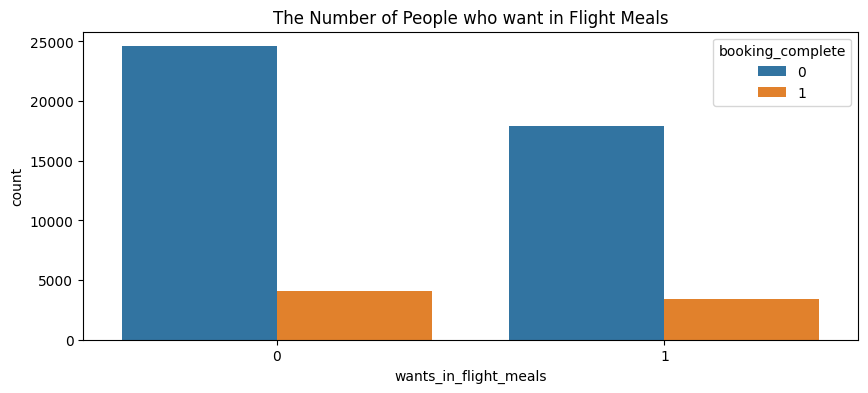

In [14]:
# Most flight day, booking and not booking
plt.figure(figsize=(10,4))
plt.title('The Number of People who want in Flight Meals')
sns.countplot(df, x='wants_in_flight_meals', hue=df['booking_complete'].astype(str), order=df.wants_in_flight_meals.value_counts().index)
plt.show()

## Conclusion
Booking incomplete is higher than Completed booking on every variables. 